In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[3 1 2]


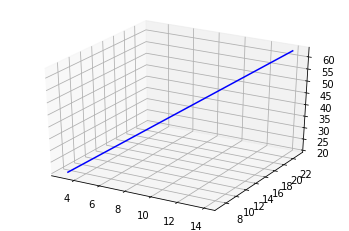

In [2]:
# create random line
np.random.seed(3)
beta = np.random.randint(1,6,(3,))
print(beta)
X = np.linspace([1, 3, 7],[1, 14, 23],100)
y = X @ beta

# plot line
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot(X[:,1],X[:,2],y,color="blue")

(array([ 1.,  3.,  7.,  9., 24., 23., 21.,  8.,  2.,  2.]),
 array([-3.32906864, -2.69134463, -2.05362062, -1.41589661, -0.77817259,
        -0.14044858,  0.49727543,  1.13499945,  1.77272346,  2.41044747,
         3.04817148]),
 <a list of 10 Patch objects>)

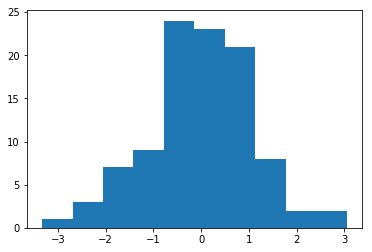

In [3]:
# create noise
mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, 100)

# plot noise
plt.hist(noise)

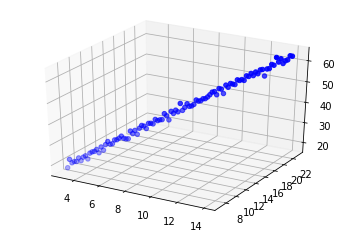

In [4]:
# add noise to y
y_noise = y + noise

# plot y_noise
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(X[:,1],X[:,2],y_noise,color="blue")

In [5]:
# estimate beta in order to minimize the square errors
beta_ = np.linalg.inv(X.T @ X) @(X.T) @ y_noise
print(beta_)

[18.66068898 -0.24429718  2.15781199]


In [6]:
# estimate y given beta_
y_ = X @ beta_

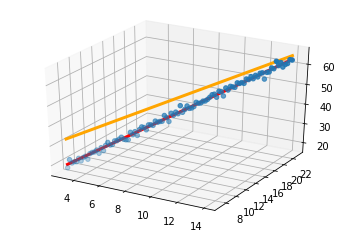

In [7]:
# compare y, y_ and y_noise
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(X[:,1],X[:,2],y_noise)
ax1.plot(X[:,1],X[:,2],y,color="red", lw=3)
ax1.plot(X[:,1],X[:,2],y_,color="orange", lw=3)